# Programmierung des Netzwerks zur Klassifizierung von Vielecken


In [1]:
from matplotlib import pyplot as plt
import network
import numpy as np
from shapes import  create_training_data
from shapes import create_test_data


/home/jmartin/PycharmProjects/NeuralNetworkForSchool/network.py:138: SyntaxWarning: invalid escape sequence '\p'
  """Return the vector of partial derivatives \partial C_x /


In [21]:
training_data=create_training_data(50000)
test_data=create_test_data(10000)
validation_data=create_test_data(10000)

In [22]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))
#print(training_data[0])

50000
10000
10000


**Erste Aufgabe:** Mache Beispiele der Trainingsdaten und deren Label sichtbar. Gib zum Beispiel 10 zufällige Datenbeispiele aus. (Warnung: Das resizing zerstört die Daten. Zum Netzwerktraining Daten neu laden.)

In [15]:
i=356
# print(training_data[i])
#print(training_data[i][1])
tmp = np.array(training_data[i][0]).reshape(28,28)
# print(training_data[i][0])

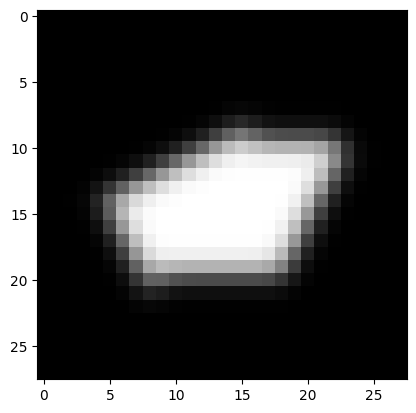

label:
 [[0], [0], [1]]


In [16]:
plt.imshow(tmp, cmap='gray', vmin=0, vmax=1)
plt.show()
print("label:\n",training_data[i][1])

**Zweite Aufgabe:** Schreibe eine kleine Funktion, die statt des Arrays, die entsprechende Ziffer zurückgibt.

In [7]:
def label(array):
    for i in range(3):
        if array[i]==[1]:
            return i+3

In [8]:
label(training_data[i][1])

3

## Erstellung eines Netzwerks, Training und Test
Ihr werdet gleich im Video sehen, was ein neuronales Netzwerk ist. Für den Moment ist es eine Black-Box, die 28x28=784 Grauwerte einliest und eine Zahl zwischen 0 und 9 wieder ausspuckt. Dafür benötigt das Netzwerk 784 Eingänge und 10 Ausgänge. Zusätzlich fügen wir noch 30 interne Gehirnzellen hinzu, die das Netzwerk komplexer und leistungsfähiger machen.

In [23]:
net = network.Network([784,30,3])
net.SGD(training_data, epochs = 3,mini_batch_size= 10,eta = 3.0, test_data=test_data)

Epoch 0 : 9137 / 10000
Epoch 1 : 9703 / 10000
Epoch 2 : 9595 / 10000


Wir testen einfach mal, wie gut das Netzwerk unsere Zahlen erkennen kann.

In [24]:
net.evaluate(validation_data)

9574

In [14]:
# Finde Falschklassifizierungen
for i in range(0,400):
    ergebnis = np.argmax(net.feedforward(training_data[i][0]))
    lbl  = label(training_data[i][1])
    if ergebnis+3!=lbl:
        print(i,ergebnis+3,lbl)

231 5 3
356 4 5
386 5 3


In [11]:
net.feedforward(training_data[4][0])

array([[9.78828274e-01],
       [2.28790459e-05],
       [1.97898325e-02]])